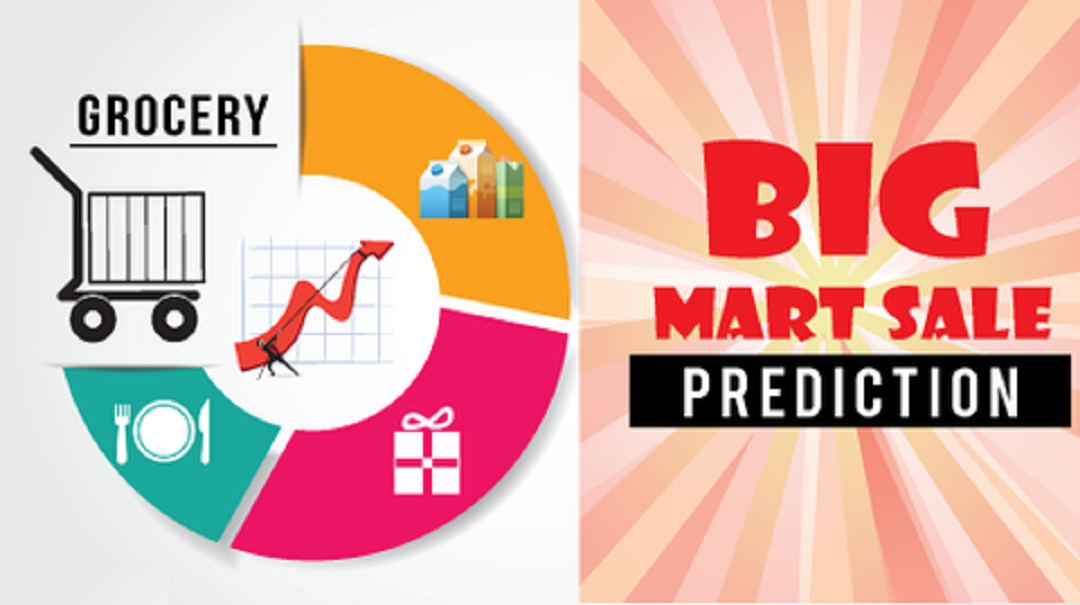

# Aim: The aim is to build a predictive model and find out the sales of each product at a particular store.

## Problem Statment

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

#### Variable Description

ItemIdentifier ---- Unique product ID  
ItemWeight ---- Weight of product  
ItemFatContent ---- Whether the product is low fat or not  
ItemVisibility ---- The % of the total display area of all products in a store allocated to the particular product  
ItemType ---- The category to which the product belongs  
ItemMRP ---- Maximum Retail Price (list price) of the product  
OutletIdentifier ---- Unique store ID  
OutletEstablishmentYear ---- The year in which the store was established  
OutletSize ---- The size of the store in terms of ground area covered  
OutletLocationType ---- The type of city in which the store is located  
OutletType ---- Whether the outlet is just a grocery store or some sort of supermarket  
ItemOutletSales ---- sales of the product in t particular store. This is the outcome variable to be predicted.  

###### First of all We have need to import all required Libarary's.

In [1]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

###### Now we have import our Data sets.

In [2]:
train= pd.read_csv(r'G:\Intershop_21\DataTrained Project\Project - 7- Big Mart Sales Prediction\bigdatamart_Train.csv')
test= pd.read_csv(r'G:\Intershop_21\DataTrained Project\Project - 7- Big Mart Sales Prediction\bigdatamart_Test.csv')

train is our training dataset.   
test is our testing dataset.

## Data Analysis

In [3]:
train.shape

(8523, 12)

In [4]:
train.head()     # Checking the first five rows of the data.

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train.tail()     # Checking the last five rows of the data.

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [6]:
train.sample(5)     # Checking the random five rows of the data.

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6154,FDP08,20.50,Regular,0.112410,Fruits and Vegetables,192.2478,OUT046,1997,Small,Tier 1,Supermarket Type1,3874.9560
3139,FDW19,12.35,Regular,0.038579,Fruits and Vegetables,109.5570,OUT045,2002,NaN,Tier 2,Supermarket Type1,1757.7120
8065,FDP11,15.85,Low Fat,0.069101,Breads,216.6166,OUT046,1997,Small,Tier 1,Supermarket Type1,4136.6154
5535,FDR55,12.15,Regular,0.132622,Fruits and Vegetables,190.1872,OUT018,2009,Medium,Tier 3,Supermarket Type2,3781.7440
7810,FDV52,20.70,Regular,0.121710,Frozen Foods,119.7466,OUT049,1999,Medium,Tier 1,Supermarket Type1,2003.3922


In [7]:
train.isnull().sum()     # Checking null values are present in dataset or not.

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

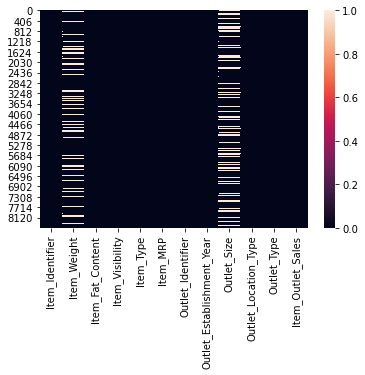

In [8]:
sns.heatmap(train.isnull())     # Checking null values are present in dataset or not with the help of Seaborn(heatmap).

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Train data having 8523 Rows and 12 columns  
Categorical Data  
-Item_Identifier  
-Item_Fat_Content  
-Item_Type     
-Outlet_Identifier    
-Outlet_Size      
-Outlet_Location_Type  
-Outlet_Type 

Other are continues

In [10]:
test.shape

(5681, 11)

In [11]:
test.head()     # Checking the first five rows of the data.

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [12]:
test.tail()     # Checking the last five rows of the data.

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [13]:
test.sample(5)     # Checking the random five rows of the data.

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1753,FDB10,10.00,Low Fat,0.067208,Snack Foods,235.5590,OUT046,1997,Small,Tier 1,Supermarket Type1
5456,FDI15,13.80,low fat,0.141928,Dairy,263.6884,OUT018,2009,Medium,Tier 3,Supermarket Type2
4366,FDN51,17.85,Regular,0.020929,Meat,260.5936,OUT013,1987,High,Tier 3,Supermarket Type1
4438,FDT25,7.50,Low Fat,0.084947,Canned,120.5072,OUT010,1998,NaN,Tier 3,Grocery Store
1825,NCJ42,19.75,Low Fat,0.014289,Household,103.8332,OUT013,1987,High,Tier 3,Supermarket Type1


In [14]:
test.isnull().sum()     # Checking null values are present in dataset or not.

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

<AxesSubplot:>

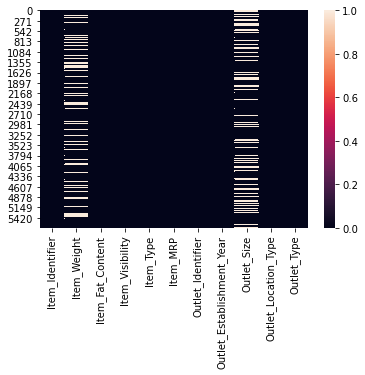

In [15]:
sns.heatmap(test.isnull())     # Checking null values are present in dataset or not with the help of Seaborn(heatmap).

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Test data having 5681 Rows and 11 columns  
Categorical Data  
-Item_Identifier  
-Item_Fat_Content  
-Item_Type     
-Outlet_Identifier    
-Outlet_Size      
-Outlet_Location_Type  
-Outlet_Type 

Other are continues

# Data Analtysis and Visualization

#### Univariate analysis of Train Data 

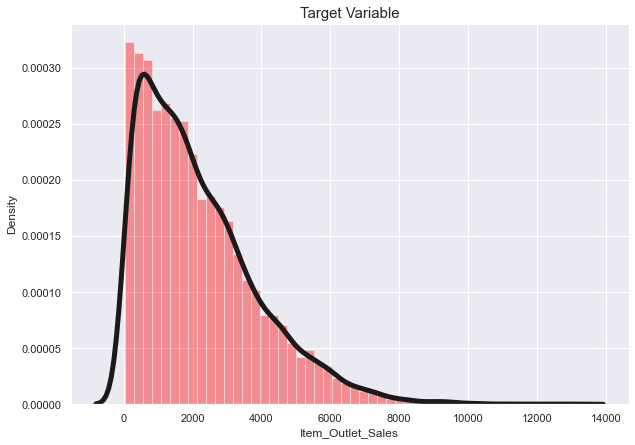

In [17]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,7))
sns.distplot(train['Item_Outlet_Sales'], color='red',kde_kws={"color": "k", "lw": 5, "label": "KDE"})
plt.title('Target Variable', fontsize=15)
plt.show()

Here we can see the sale desity of range 0-2500  is higher,
Max sale is around 14000,  
Data is having outliers.

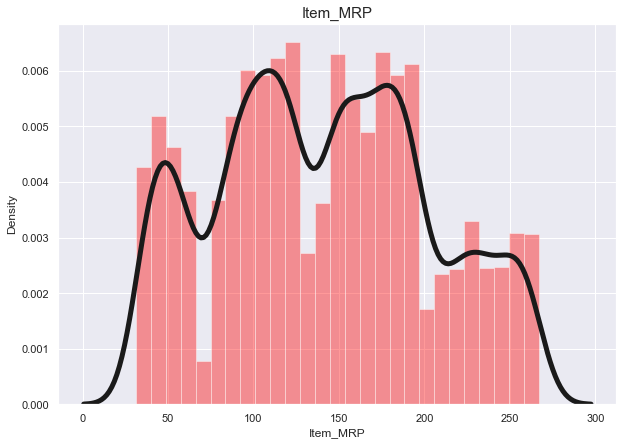

In [18]:
plt.figure(figsize=(10,7))
sns.distplot(train['Item_MRP'], color='red',kde_kws={"color": "k", "lw": 5, "label": "KDE"})
plt.title('Item_MRP', fontsize=15)
plt.show()

Here we can see Max MRP for a product is slightlty higher than 250 and minimum MRP is greater than 25.  
Most of the products are in range of 75- 200 

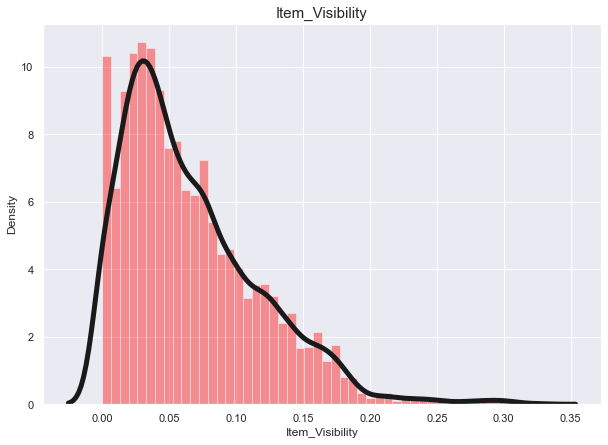

In [19]:
plt.figure(figsize=(10,7))
sns.distplot(train['Item_Visibility'], color='red',kde_kws={"color": "k", "lw": 5, "label": "KDE"})
plt.title('Item_Visibility', fontsize=15)
plt.show()

Here we can see min value of visiblity is 0, and many product having visiblity 0, which is not possible.   
we will treat this later  
Max density of product having visiblity less than 0.10,  
Desnsity of product having visiblity more than 0.20 are less in number, and max visiblity is around 0.35 
We can see outliers are also presenst.

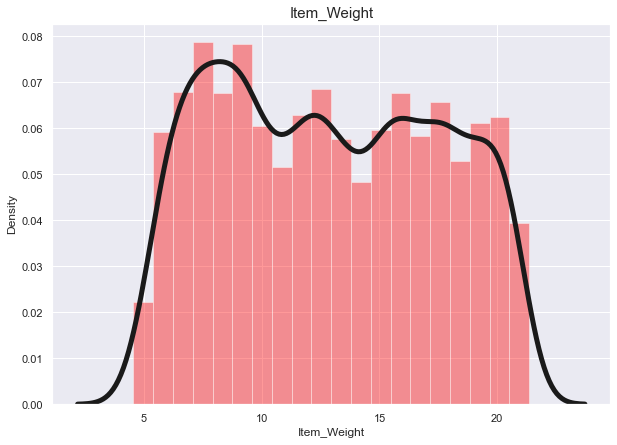

In [20]:
plt.figure(figsize=(10,7))
sns.distplot(train['Item_Weight'], color='red',kde_kws={"color": "k", "lw": 5, "label": "KDE"})
plt.title('Item_Weight', fontsize=15)
plt.show()

Item_Weight is having range between 5 to 20.   
Item_Weight between 6-10 having higher Density.

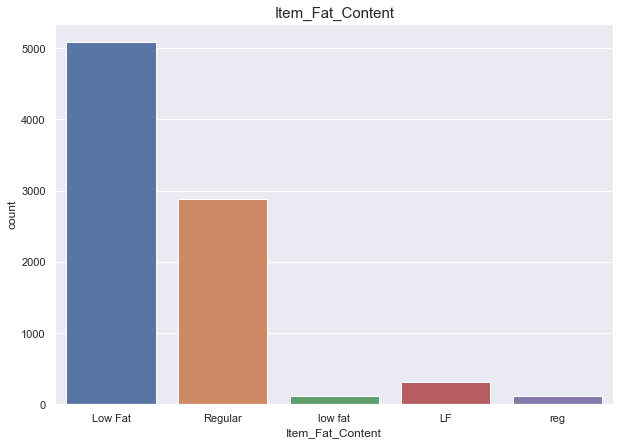

In [21]:
plt.figure(figsize=(10,7))
sns.countplot(train['Item_Fat_Content'])
plt.title('Item_Fat_Content', fontsize=15)
plt.show()

Here we can number of Low Fat content products are higher than the regular.  
One more thing to observe that LF and low fat are same catagory with difrent notaion, reg used for regular.  
So we can see products having only Two catagory, which is Low Fat and Regular.   
we will deal with his later in the data cleaning process

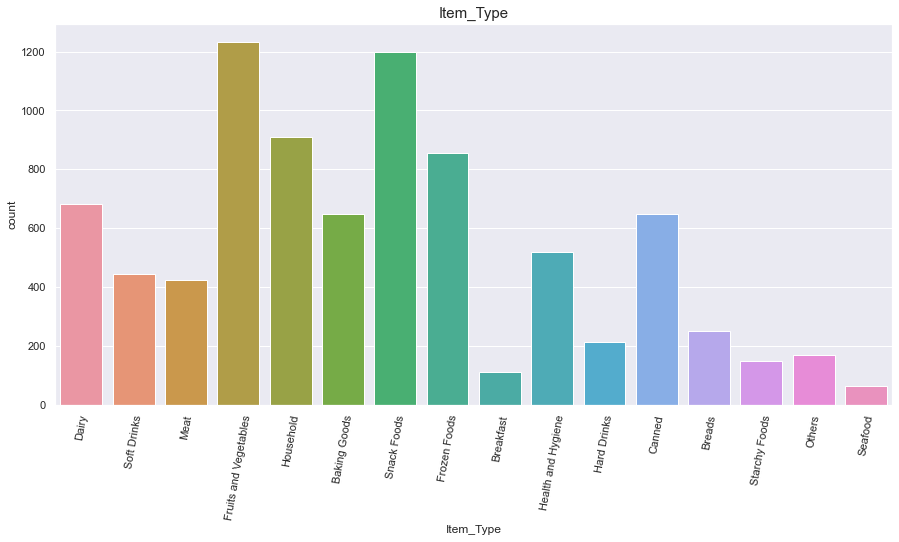

In [22]:
plt.figure(figsize=(15,7))
sns.countplot(train['Item_Type'], )
plt.title('Item_Type', fontsize=15)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.show()

Here we can see Fruits and Vegitables having max count and Seafood is having minmum count.  
we can say Fruits_Vegitables and Snacks Foods are having good sale as compare to other.

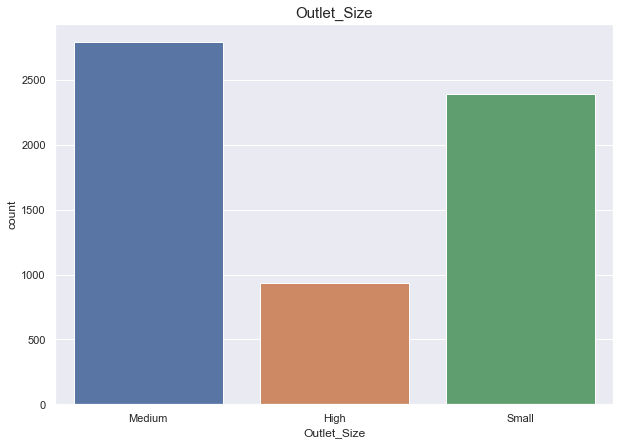

In [23]:
plt.figure(figsize=(10,7))
sns.countplot(train['Outlet_Size'], )
plt.title('Outlet_Size', fontsize=15)
plt.show()

Here we can see Most of the outlet are Medium in Size.  
High_Size outlet are less in number.  

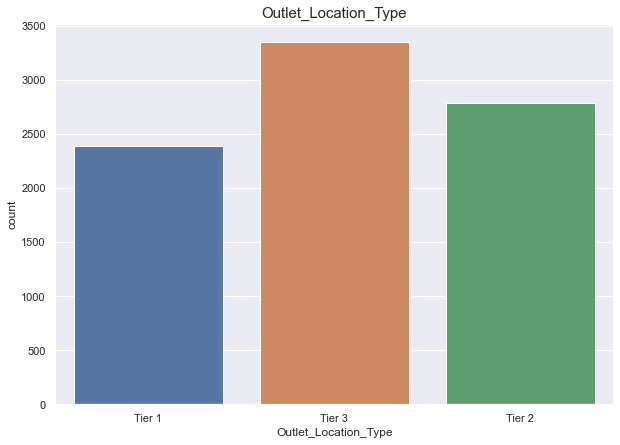

In [24]:
plt.figure(figsize=(10,7))
sns.countplot(train['Outlet_Location_Type'], )
plt.title('Outlet_Location_Type', fontsize=15)
plt.show()

Here we can see max outlets are present in Tier 3 city.  
Number of outlet in Tier 1 are less.

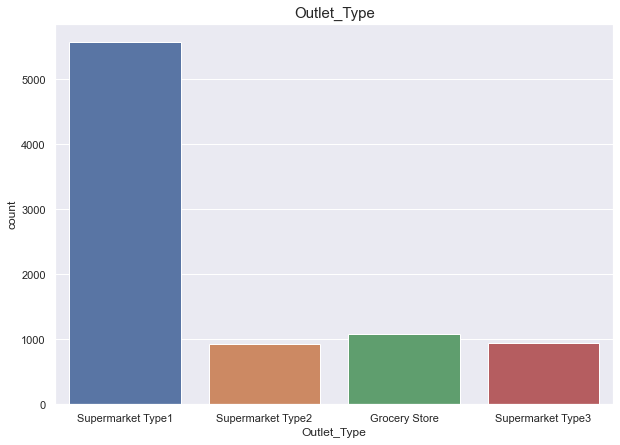

In [25]:
plt.figure(figsize=(10,7))
sns.countplot(train['Outlet_Type'], )
plt.title('Outlet_Type', fontsize=15)
plt.show()

Here we can see Supermarket type 1 are maximun in m=numbers.   
Other are very less in number as compar to Type 1.  
we can see most of the product are sold from Supermarket type 1.

#### Bivariate Analysis

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

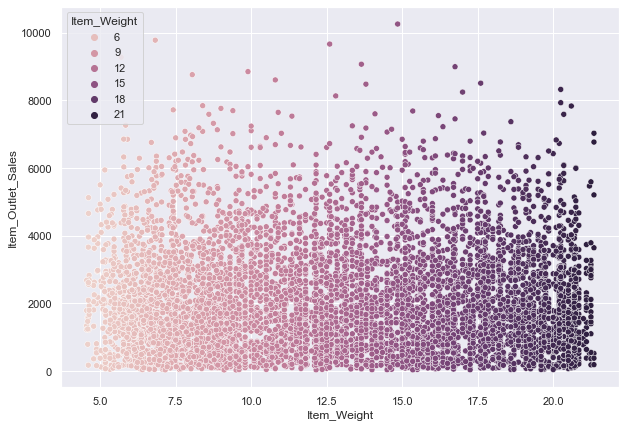

In [26]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=train, x='Item_Weight', y='Item_Outlet_Sales', hue='Item_Weight')

Here we can see ItemPWeight is not having much effect on sale of product.  
each weight category having almost same sales pattern.

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

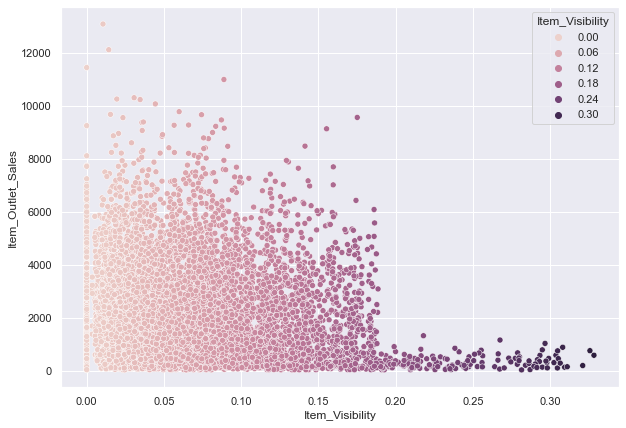

In [27]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=train, x='Item_Visibility', y='Item_Outlet_Sales',hue='Item_Visibility')

Here we can see most of the item within visiblity 0.20 are having good sale.  
sales for visiblity more than 0.20 is very less  
more than 7000 items having visiblity 0 , whisch is not possible.

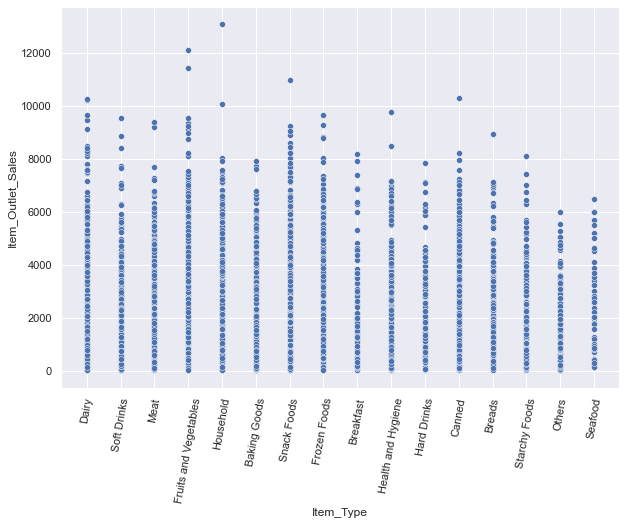

In [28]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=train, x='Item_Type', y='Item_Outlet_Sales')
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.show()

Here we can see Item_type is having less impact on sales.

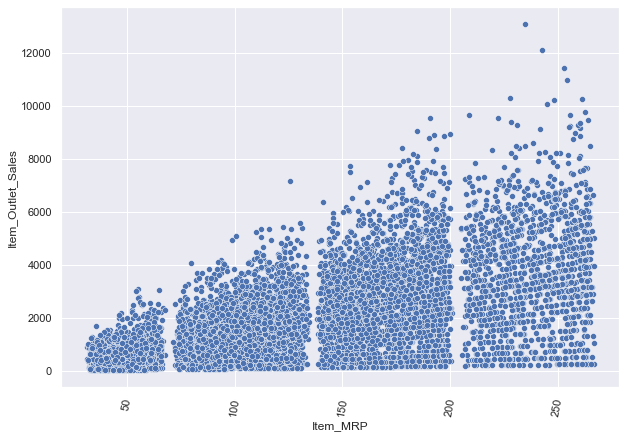

In [29]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=train, x='Item_MRP', y='Item_Outlet_Sales')
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.show()

Here we can see positive relationship. As the MRP increasing, Item_outlet_sales also increasing.

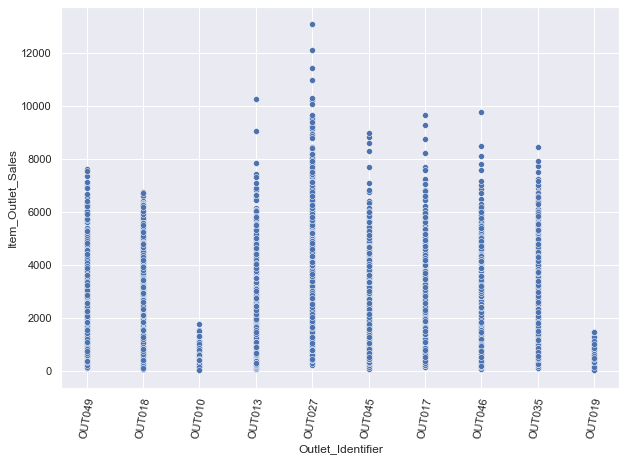

In [30]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=train, x='Outlet_Identifier', y='Item_Outlet_Sales')
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.show()

we can see for OUT027 we havr hiighest Item_outlate_sales.

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

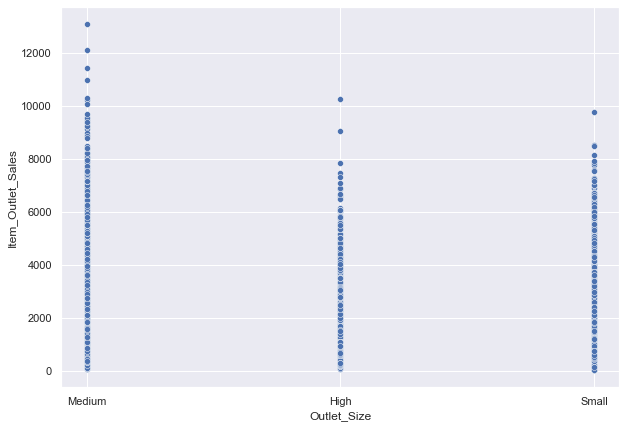

In [31]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=train, x='Outlet_Size', y='Item_Outlet_Sales')


Here we casn see sale Sales of medium Size store is high.

Lets merge both training and testing dataset, so that we can perform all the step of data preprocessing in one go.

In [32]:
train['source'] = 'train'
test['source'] = 'test'
test['Item_Outlet_Sales'] = 0
data = pd.concat([train, test],  sort=False)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 13) (14204, 13)


Here we have set test ['Item_Outlet_Sales'] = 0, so that our data should have same dimension, after all cleaning steps we will drop that from test dataset.

In [33]:
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,train
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,train
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,train


#### Checking Null Values

In [34]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

We can see null values are present in two columns:  
Item_Weight - 2439  
Outlet_Size - 4016


#### Data cleaning and imputing

###### Item_Weight
Item_Weight is an contineus value.   
We can use mean of the Item_Weight to replace the Nan values.

In [35]:
data['Item_Weight'].fillna(value=data['Item_Weight'].mean(), inplace= True)

In [36]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

Nan values for Item_Weight filled using mean of Item_Weight column.

#### Outlet_Size
Outlet_Size is a categorical value, we can replace it using mode.

In [37]:
Mode_of_Outlet_Size= data.pivot_table(values= 'Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [38]:
Mode_of_Outlet_Size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


We calculated the Mode on the basis of Outlet_type

In [39]:
missing_values=data['Outlet_Size'].isnull()

In [40]:
data.loc[missing_values,'Outlet_Size'] = data.loc[missing_values,'Outlet_Type'].apply(lambda x: Mode_of_Outlet_Size[x])
print (sum(data['Outlet_Size'].isnull()))

0


In [41]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

###### Now data is not having any Null values.

In [42]:
data.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,train
7,FDP10,12.792854,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986,train
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350,train


In [43]:
categorial_features = data.select_dtypes(include=[np.object])
categorial_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,train
3,FDX07,Regular,Fruits and Vegetables,OUT010,Small,Tier 3,Grocery Store,train
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,train


In [44]:
numerical_features = data.select_dtypes(include=[np.number])
numerical_features.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


we have devided data into categorial_features and numerical_features.

Lets check  every columns one by one.

In [45]:
data['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [46]:
for col in categorial_features:
    print('\n%s column: '%col)
    print(data[col].value_counts())
    print('*'*20)


Item_Identifier column: 
FDS25    10
FDS40    10
FDB60    10
NCU18    10
FDD08    10
         ..
FDR51     7
FDH58     7
FDO33     7
FDI46     7
NCL42     7
Name: Item_Identifier, Length: 1559, dtype: int64
********************

Item_Fat_Content column: 
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
********************

Item_Type column: 
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
********************

Outlet_Identifier column: 
OUT027    1559
OUT013    15

###### Item_Identifier columns:
 we have 1559 products. If we encode 1559 values will create no sense. But we can see first two alphabet its gives specofic indication like FD for Food , DR for Drinks and NC for Non Consumables.  
so we can encode Identifier in 3 catagories.



###### Item_Fat_Content:
Here we have 5 catagories Low Fat, Regular, LF, reg ,low fat . Here LF , low fat and Low fat are same so we can combine them to make them one, and Regular , reg are also same  , we will make this one catagory.

###### For columns Item_Type,  Outlet_Identifier,  Outlet_Size,   Outlet_Location_Type  and Outlet_Type   data not havig error.

##### Item_Visibility 
It has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

##### Outlet_Establishment_Years 
vary from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales.

###### Categorizing the  Item_Identifier columns as FD, DR and NC

In [47]:
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train


In [48]:
#Get the first two characters of the ID column.
data['Item_type']=data['Item_Identifier'].apply(lambda x: x[0:2])

In [49]:
#Mapping the values
data['Item_type']=data['Item_type'].map({'FD':'Food Product', 'DR':'Drinks',  'NC':'Non Consumable'})
data['Item_type'].value_counts()

Food Product      10201
Non Consumable     2686
Drinks             1317
Name: Item_type, dtype: int64

##### Correction in Item_Fat_Content: Categorizing into Low Fat and Regular 

In [50]:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())

print('\nModified Categories:')

data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular', 'low fat':'Low Fat'})
                                                             
print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


##### Item_Visibility
It has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0. 

In [51]:
data[data['Item_Visibility']== 0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_type
3,FDX07,19.200000,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,Food Product
4,NCD19,8.930000,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non Consumable
5,FDP36,10.395000,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train,Food Product
10,FDY07,11.800000,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266,train,Food Product
32,FDP33,18.700000,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064,train,Food Product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5643,FDQ19,12.792854,Regular,0.0,Fruits and Vegetables,244.3512,OUT019,1985,Small,Tier 1,Grocery Store,0.0000,test,Food Product
5648,FDK26,12.792854,Regular,0.0,Canned,187.5240,OUT027,1985,Medium,Tier 3,Supermarket Type3,0.0000,test,Food Product
5654,FDQ57,7.275000,Low Fat,0.0,Snack Foods,144.5760,OUT013,1987,High,Tier 3,Supermarket Type1,0.0000,test,Food Product
5661,DRG37,12.792854,Low Fat,0.0,Soft Drinks,155.7972,OUT027,1985,Medium,Tier 3,Supermarket Type3,0.0000,test,Drinks


###### 879 rows of   Item_Visibility are having zero value,  We cannot drop thses row 

In [52]:
Item_Visibility_mean=data['Item_Visibility'].mean()

In [53]:
data['Item_Visibility'] = data['Item_Visibility'].replace({0:Item_Visibility_mean})


In [54]:
(data['Item_Visibility']== 0).sum()

0

#### Outlet_Establishment_Years


In [55]:
data['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
2004    1550
1997    1550
1999    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

We have Outlet_Establishment_Year range from 1985 to 2009.   
we will calculate years_of_Opertaion as 2009- Outlet_Establishment_Year

In [56]:
data['Years_of_Opertaion']=2009-data['Outlet_Establishment_Year']

In [57]:
data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_type,Years_of_Opertaion
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food Product,10
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food Product,10
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,Food Product,11
4,NCD19,8.93,Low Fat,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non Consumable,22


Lets drop columns for which we have created New columns.

In [58]:
data.drop(['Item_Identifier','Outlet_Establishment_Year'], axis=1, inplace = True )

In [59]:
#We are droping Outlet_Identifier  also, it is not having relevent contribution.
data.drop(['Outlet_Identifier'],axis=1, inplace = True)

In [60]:
data .head(3)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_type,Years_of_Opertaion
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food Product,10
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks,0
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food Product,10


#### Encoding Categorical Features:

In [61]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

col= ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_type']
for i in col:
    data[i]=le.fit_transform(data[ i ])
    

### Dividing Training and Testing data

In [62]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

In [63]:
train.shape

(8523, 11)

In [64]:
test.shape

(5681, 10)

In [65]:
train.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_type,Years_of_Opertaion
Item_Weight,1.000000,-0.021142,-0.018001,0.028022,0.024806,-0.013747,0.003552,-0.002932,0.011083,0.063190,0.004267
Item_Fat_Content,-0.021142,1.000000,0.049914,-0.139434,0.006063,-0.001262,-0.001598,0.002199,0.018719,-0.166111,-0.003151
Item_Visibility,-0.018001,0.049914,1.000000,-0.036003,-0.005248,0.097536,-0.027864,-0.179611,-0.134141,-0.046272,0.078356
Item_Type,0.028022,-0.139434,-0.036003,1.000000,0.032651,-0.000218,0.003084,0.003053,0.017048,0.007456,-0.004970
Item_MRP,0.024806,0.006063,-0.005248,0.032651,1.000000,0.000872,0.000232,-0.001975,0.567574,0.032517,-0.005020
Outlet_Size,-0.013747,-0.001262,0.097536,-0.000218,0.000872,1.000000,-0.480075,-0.401373,-0.162753,-0.001276,-0.425534
Outlet_Location_Type,0.003552,-0.001598,-0.027864,0.003084,0.000232,-0.480075,1.000000,0.467219,0.089367,0.007661,0.089216
Outlet_Type,-0.002932,0.002199,-0.179611,0.003053,-0.001975,-0.401373,0.467219,1.000000,0.401522,0.001136,0.122304
Item_Outlet_Sales,0.011083,0.018719,-0.134141,0.017048,0.567574,-0.162753,0.089367,0.401522,1.000000,0.011236,0.049135
Item_type,0.063190,-0.166111,-0.046272,0.007456,0.032517,-0.001276,0.007661,0.001136,0.011236,1.000000,0.008551


<AxesSubplot:>

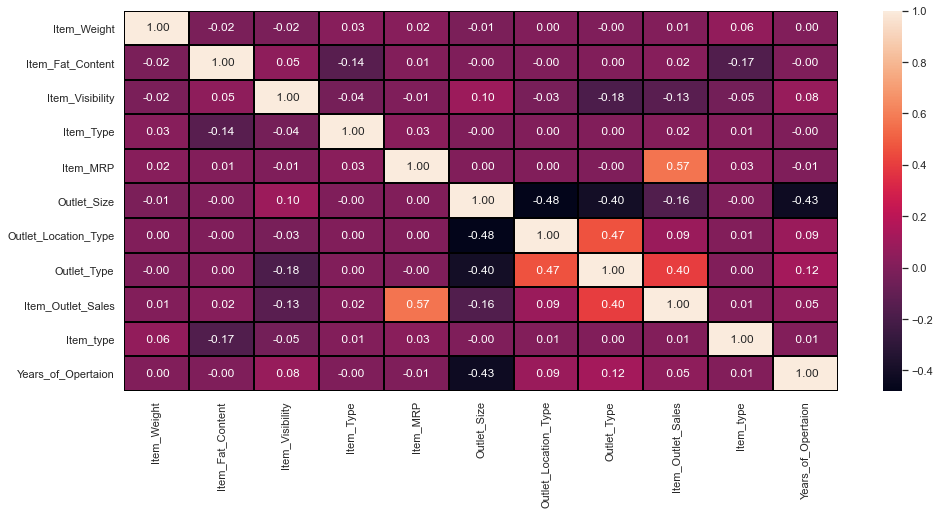

In [66]:
plt.figure(figsize=(16, 7))

sns.heatmap(train.corr(),annot= True,linewidths=1,linecolor='black',fmt=' .2f' )

Checking the columns which are positively and negatively correlated with the target.

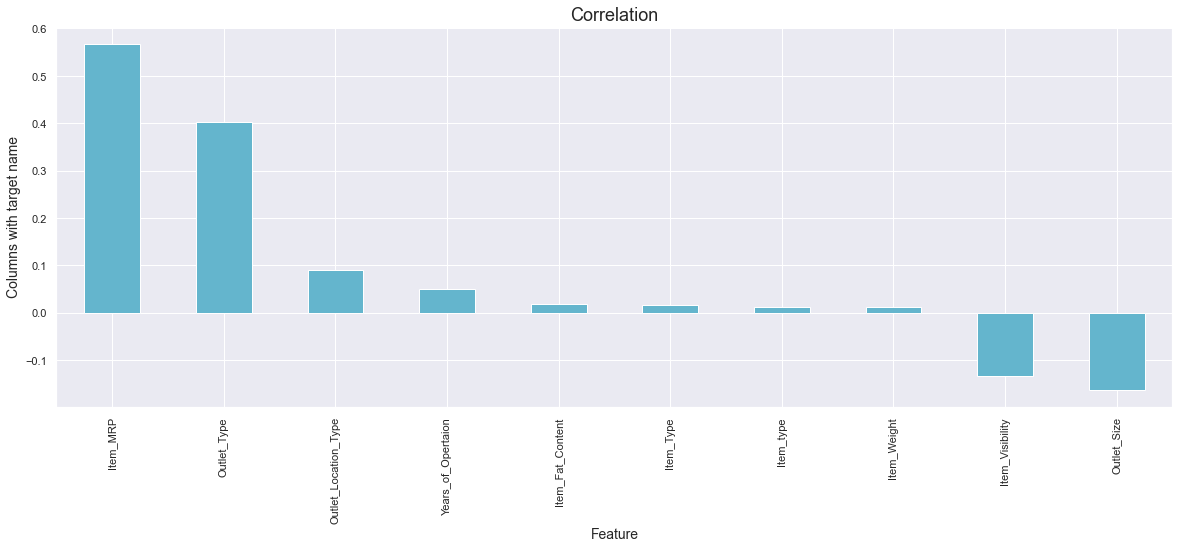

In [67]:
plt.figure(figsize=(20,7))
train.corr()['Item_Outlet_Sales'].sort_values(ascending=False).drop(['Item_Outlet_Sales']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Here we can see Item_visiblity and Outlet_size having negative corellation and other having Positive correlation.

### Checking outliers:

We will check outliers for contineous colums, as catagorical data not having any outliers.

<AxesSubplot:>

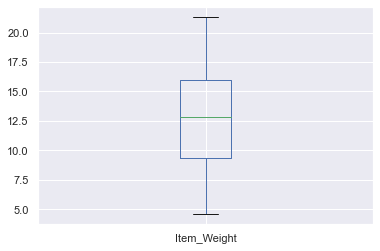

In [68]:
train['Item_Weight'].plot.box()

<AxesSubplot:>

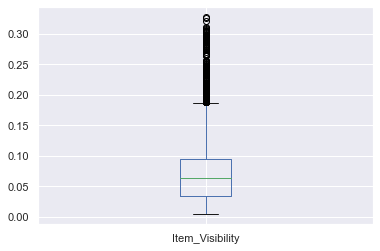

In [69]:
train['Item_Visibility'].plot.box()

<AxesSubplot:>

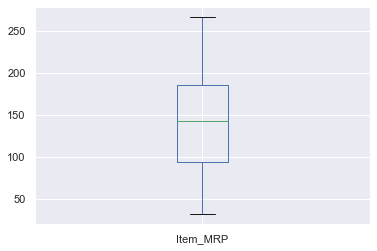

In [70]:
train['Item_MRP'].plot.box()

<AxesSubplot:>

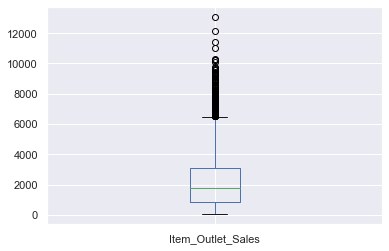

In [71]:
train['Item_Outlet_Sales'].plot.box()

<AxesSubplot:>

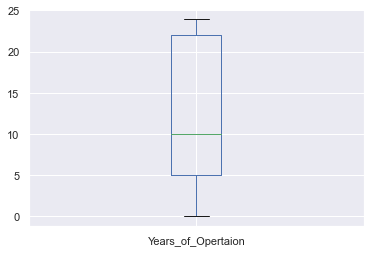

In [72]:
train['Years_of_Opertaion'].plot.box()

Here we can see only two colums "Years_of_Opertaion" and "Item_Visibility"  having Outliers.

# Removing Outliers

In [73]:
from scipy.stats import zscore
z= np.abs(zscore(train))
z

array([[0.83922588, 0.73814723, 1.11110934, ..., 0.910601  , 0.17979501,
        0.13954076],
       [1.63904672, 1.35474328, 1.04482003, ..., 1.01844035, 2.09528612,
        1.33410274],
       [1.10116786, 0.73814723, 1.09648522, ..., 0.04923754, 0.17979501,
        0.13954076],
       ...,
       [0.53160248, 0.73814723, 0.71843133, ..., 0.57909963, 1.73569609,
        0.73682175],
       [1.33378966, 1.35474328, 1.53916558, ..., 0.19672492, 0.17979501,
        1.33410274],
       [0.46225773, 0.73814723, 0.51957848, ..., 0.82959407, 2.09528612,
        0.09937163]])

In [74]:
df=train[(z<3).all(axis=1)]
print(train.shape)
print(df.shape)

(8523, 11)
(8334, 11)


### Removing Skweness

In [75]:
train.skew()

Item_Weight             0.098453
Item_Fat_Content        0.616705
Item_Visibility         1.287478
Item_Type               0.101655
Item_MRP                0.127202
Outlet_Size            -0.861866
Outlet_Location_Type   -0.209093
Outlet_Type             0.927438
Item_Outlet_Sales       1.177531
Item_type               0.114510
Years_of_Opertaion      0.396641
dtype: float64

Here we are considring skewness only for contineous data and only for Feature column.  
Here Item_Visibility is the only colum having Skewness.

In [76]:
train['Item_Visibility'] = np.log( train['Item_Visibility'] )

In [77]:
train.skew()

Item_Weight             0.098453
Item_Fat_Content        0.616705
Item_Visibility        -0.484458
Item_Type               0.101655
Item_MRP                0.127202
Outlet_Size            -0.861866
Outlet_Location_Type   -0.209093
Outlet_Type             0.927438
Item_Outlet_Sales       1.177531
Item_type               0.114510
Years_of_Opertaion      0.396641
dtype: float64

### Scaling the data Using StandardScaler.

In [78]:
# Dividing into Feature and Target data
x=train.drop(['Item_Outlet_Sales'],axis=1)
y=train['Item_Outlet_Sales']

In [79]:
x.shape

(8523, 10)

In [80]:
y.shape

(8523,)

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
SDC=StandardScaler()
x=SDC.fit_transform(x)

In [83]:
x

array([[-0.83922588, -0.73814723, -1.59419711, ..., -0.25265831,
        -0.17979501, -0.13954076],
       [-1.63904672,  1.35474328, -1.35429802, ...,  1.00297245,
        -2.09528612, -1.33410274],
       [ 1.10116786, -0.73814723, -1.53736093, ..., -0.25265831,
        -0.17979501, -0.13954076],
       ...,
       [-0.53160248, -0.73814723, -0.56741182, ..., -0.25265831,
         1.73569609, -0.73682175],
       [-1.33378966,  1.35474328,  1.286544  , ...,  1.00297245,
        -0.17979501, -1.33410274],
       [ 0.46225773, -0.73814723, -0.24922318, ..., -0.25265831,
        -2.09528612,  0.09937163]])

Here we are not checking Multicolinearity as most of the columns are categorical

# Model Design

In [84]:
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# 1.LinearRegression

In [85]:
lr=LinearRegression()
for i in range(0, 100):
    x_train, x_test, y_train, y_test= train_test_split(x,y,random_state= i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train= lr.predict(x_train)
    pred_test= lr.predict(x_test)
    print(f"At Random Stat {i}, the training accuracy is:{r2_score(y_train,pred_train)}")
    print(f"At Random Stat {i}, the testing accuracy is:{r2_score(y_test,pred_test)}")
    print("\n")

At Random Stat 0, the training accuracy is:0.4991502658172362
At Random Stat 0, the testing accuracy is:0.5058189625465666


At Random Stat 1, the training accuracy is:0.5005694329549548
At Random Stat 1, the testing accuracy is:0.49975865382192164


At Random Stat 2, the training accuracy is:0.5044479230826947
At Random Stat 2, the testing accuracy is:0.48454074225521393


At Random Stat 3, the training accuracy is:0.49139639718056205
At Random Stat 3, the testing accuracy is:0.5357882307994403


At Random Stat 4, the training accuracy is:0.5021182827226176
At Random Stat 4, the testing accuracy is:0.49237544594168114


At Random Stat 5, the training accuracy is:0.5032419824505869
At Random Stat 5, the testing accuracy is:0.4894348944000336


At Random Stat 6, the training accuracy is:0.49993794951008896
At Random Stat 6, the testing accuracy is:0.5017278144175568


At Random Stat 7, the training accuracy is:0.5042034186295214
At Random Stat 7, the testing accuracy is:0.48670263563624

At Random Stat 85, the training accuracy is:0.5004686350508631   
    
At Random Stat 85, the testing accuracy is:0.5000139709403428  

At Random Stat 85 we are getting very less diffrence in training and testing accuracy.
    

In [86]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y, test_size=0.20, random_state= 85)

In [87]:
lr.fit(x_train_b,y_train_b)
pred_test=lr.predict(x_test_b)

print(r2_score(y_test_b,pred_test))

0.5000139709403428


linear Regression giving model accuracy = 0.5018597031049953 percent.

In next step we will perform cross validation of the model.

# Cross Validation of Model

In [88]:
test_accuracy= r2_score(y_test_b,pred_test)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 49.858399334563856 and Accuracy score is 50.00139709403428
At cross fold 3 the Cross Val score is 49.8866204739681 and Accuracy score is 50.00139709403428
At cross fold 4 the Cross Val score is 49.77064254735986 and Accuracy score is 50.00139709403428
At cross fold 5 the Cross Val score is 49.85947050001672 and Accuracy score is 50.00139709403428
At cross fold 6 the Cross Val score is 49.81515778845551 and Accuracy score is 50.00139709403428
At cross fold 7 the Cross Val score is 49.90844095599331 and Accuracy score is 50.00139709403428
At cross fold 8 the Cross Val score is 49.83799464632808 and Accuracy score is 50.00139709403428
At cross fold 9 the Cross Val score is 49.85310773677155 and Accuracy score is 50.00139709403428


In [89]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_test))
print('Mean Squared Error:', mean_squared_error(y_test_b,pred_test))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,pred_test)))

Error:
Mean Absolute Error: 918.1941692650104
Mean Squared Error: 1520943.6671717872
Root Mean Square Error: 1233.2654487869945


At cross fold 7 the Cross fold 7 the Cross Val score is 49.90844095599331 and Accuracy score is 50.00139709403428

Model accuracy is not good, we can use regularization to find best results, lets check.

# 2. Lasso

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters= {'alpha':[0.0001,0.001,0.01,0.1,1,10], 'random_state': list(range(0,10)), 'selection':['cyclic', 'random'], 'max_iter':[500,1000,1200,1500,2000]}
ls=Lasso()
clf=GridSearchCV(ls, parameters)
clf.fit(x_train_b, y_train_b)
print(clf.best_params_)

{'alpha': 1, 'max_iter': 500, 'random_state': 4, 'selection': 'random'}


In [91]:
ls=Lasso(alpha=1,max_iter=500, random_state=4, selection='random')
ls.fit(x_train_b, y_train_b)
ls.score(x_train_b, y_train_b)
ls_pred=ls.predict(x_test_b)

lsd=r2_score(y_test_b, ls_pred)
print('R2 score:', lsd*100)

rdscore= cross_val_score(ls,x,y,cv=7)
lsc=rdscore.mean()
print('Cross val Score :', lsc*100)

R2 score: 50.009224035701706
Cross val Score : 49.91154530747525


In [92]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,ls_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,ls_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,ls_pred)))

Error:
Mean Absolute Error: 918.0201472275465
Mean Squared Error: 1520705.573771762
Root Mean Square Error: 1233.1689153444315


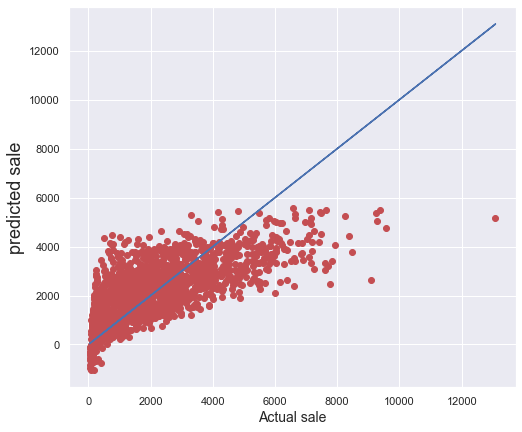

In [93]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= ls_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sale', fontsize= 14 )
plt.ylabel('predicted sale', fontsize= 18)
plt.show()

Accuracy is same as liner Regression , errors also same. Lets check for Ridge regularization.

# 3. Ridge

In [94]:
parameters= {'alpha':[0.0001,0.001,0.01,0.1,1,10], 'fit_intercept': [True,False], 'normalize':[True, False], 'copy_X': [True , False], 'tol':[0.0001,0.001,0.01,0.1,1,10]}
rd=Ridge()
rdclf=GridSearchCV(rd, parameters)
rdclf.fit(x_train_b, y_train_b)
print(rdclf.best_params_)

{'alpha': 10, 'copy_X': True, 'fit_intercept': True, 'normalize': False, 'tol': 0.0001}


In [95]:
rd= Ridge(alpha= 10, copy_X= True, fit_intercept= True, normalize= False, tol= 0.0001)
rd.fit(x_train_b, y_train_b)
rd.score(x_train_b, y_train_b)
rd_pred= rd.predict(x_test_b)

rds=r2_score(y_test_b, rd_pred)
print('r2 score: ', rds*100)

rdcvscore= cross_val_score(rd,x,y,cv=7)
rdcv=rdcvscore.mean()
print('Cross val Score', rdcv*100)

r2 score:  49.998374479631956
Cross val Score 49.908818510500815


In [96]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rd_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rd_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rd_pred)))

Error:
Mean Absolute Error: 918.0898866374474
Mean Squared Error: 1521035.6142656323
Root Mean Square Error: 1233.302726124301


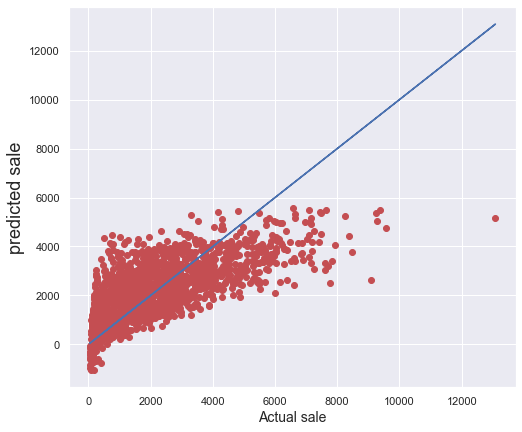

In [97]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= rd_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sale', fontsize= 14 )
plt.ylabel('predicted sale', fontsize= 18)
plt.show()

r2 score:  49.99837447963193
Cross val Score 49.90881851050084
Both the score are almost same, we can consider this model, But lets try DecisionTreeRegressor.

# 3.DecisionTreeRegressor

In [98]:
parameters={'criterion':['mse','friedman_mse', 'mae', 'poisson'], 'splitter':['best', 'random'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
dt=DecisionTreeRegressor()
dtclf= GridSearchCV(dt, parameters )
dtclf.fit(x_train_b, y_train_b)
print(dtclf.best_params_) 

{'criterion': 'mse', 'max_depth': 5, 'splitter': 'best'}


In [99]:
dt=DecisionTreeRegressor(criterion='friedman_mse', splitter='best', max_depth =5)
dt.fit(x_train_b, y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score=r2_score(y_test_b, dt_pred)
print('R2 Score:', dt_score*100)

dtcvscore=cross_val_score(dt,x,y,cv=7)
dtcv=dtcvscore.mean()
print('Cross Val Score:', dtcv*100)

R2 Score: 60.30475831318166
Cross Val Score: 59.149530512647516


In [100]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,dt_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,dt_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,dt_pred)))

Error:
Mean Absolute Error: 772.9631555597402
Mean Squared Error: 1207518.269539811
Root Mean Square Error: 1098.871361688806


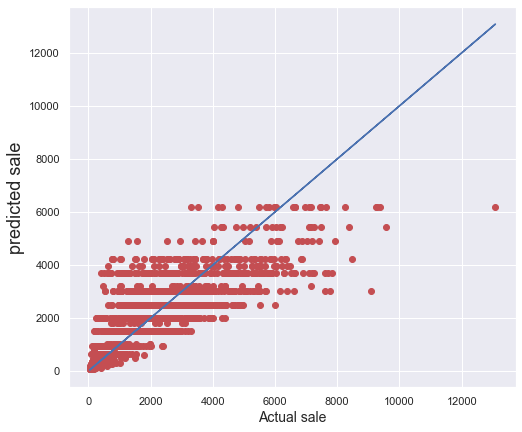

In [101]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= dt_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sale', fontsize= 14 )
plt.ylabel('predicted sale', fontsize= 18)
plt.show()

R2 Score: 60.30475831318166
Cross Val Score: 59.15213059012068

There is diffrence in Cv score  model abd R2 score. lets check for anaother Model.

# 4. KNeighborsRegressor

In [102]:
parameters={'n_neighbors':[1,2,3,5,6,7,8,9,10,15],'weights':['uniform', 'distance'], 'algorithm':['auto','ball_tree','kd_tree'],'leaf_size':[10,20,30,40,50] }
kn=KNeighborsRegressor()
knclf=GridSearchCV(kn,parameters)
knclf.fit(x_train_b, y_train_b)
print(knclf.best_params_)

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 15, 'weights': 'uniform'}


In [103]:
kn=KNeighborsRegressor(algorithm='auto', n_neighbors=15, weights='uniform', leaf_size=10)
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= r2_score(y_test_b, kn_pred)
print('R2 Score: 0', kn_score*100)

kn_cvscore=cross_val_score(kn,x,y, cv=7)
cv_mean=kn_cvscore.mean()
print('Cross val Score :',cv_mean*100 )

R2 Score: 0 55.53107064761913
Cross val Score : 55.35715688024398


In [104]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,kn_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,kn_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,kn_pred)))

Error:
Mean Absolute Error: 825.564873368524
Mean Squared Error: 1352732.5275791509
Root Mean Square Error: 1163.0703020794363


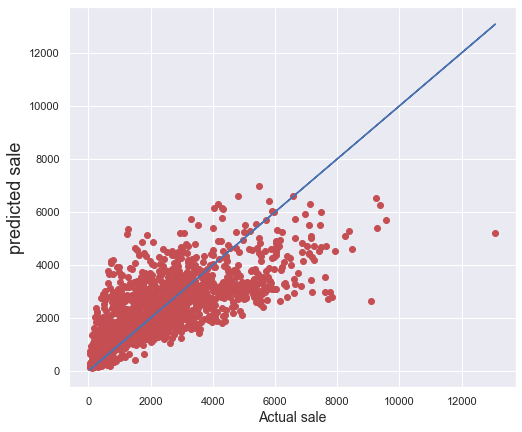

In [105]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= kn_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sale', fontsize= 14 )
plt.ylabel('predicted sale', fontsize= 18)
plt.show()

R2 Score: 0 55.53107064761913
Cross val Score : 55.35715688024398

R2score and Cross_val_score are almost same , we can consider this model. it is giving good accuracy over DecisionTreeRegressor.

# 5. Ensemble Techniques

In [106]:
parameters={'criterion':['mse', 'mae'],'max_features':['auto', 'sqrt', 'log2'],'n_estimators':[50,75,100,125,150,175]}
rf=RandomForestRegressor()
rfclf=GridSearchCV(rf, parameters)
rfclf.fit(x_train_b, y_train_b)
print(rfclf.best_params_)

{'criterion': 'mae', 'max_features': 'log2', 'n_estimators': 125}


In [107]:
rf=RandomForestRegressor(criterion='mae', max_features='log2', n_estimators=175)
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= r2_score(y_test_b, rf_pred)
print('R2 score:', rf_score*100)

rfcv=cross_val_score(rf,x,y, cv=7)
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore*100 )

R2 score: 58.80531308820069
Cross val Score : 57.122849936932404


In [108]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rf_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rf_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rf_pred)))

Error:
Mean Absolute Error: 778.9089970362799
Mean Squared Error: 1253130.978428796
Root Mean Square Error: 1119.4333291575679


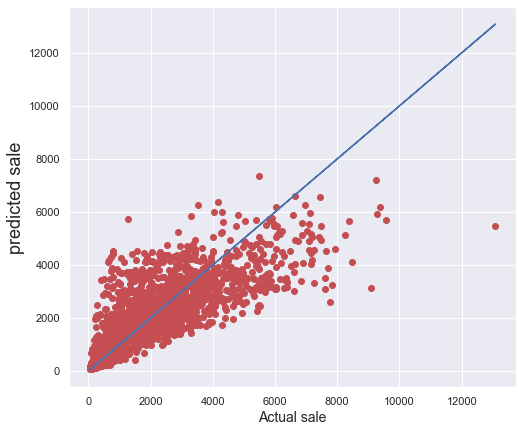

In [109]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= rf_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sale', fontsize= 14 )
plt.ylabel('predicted sale', fontsize= 18)
plt.show()

R2 score: 58.52539946563129
Cross val Score : 56.935426406141346
We cannot consider this model as both score having huge diffrence.

# 6.GradientBoostingRegressor

In [110]:
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['ls', 'lad', 'huber', 'quantile'],'criterion':['friedman_mse', 'mse', 'mae'], 'learning_rate':[0.001,0.01,0.1,1]}
gb=GradientBoostingRegressor()
gbclf=GridSearchCV(gb, parameters)
gbclf.fit(x_train_b, y_train_b)
print(gbclf.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'lad'}


In [111]:
gb=GradientBoostingRegressor(criterion='friedman_mse', loss='lad',learning_rate=0.1)
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b,y_train_b)
gb_pred=rf.predict(x_test_b)

gb_score= r2_score(y_test_b, rf_pred)
print('R2 score:', gb_score*100)

gbcv=cross_val_score(gb,x,y, cv=7)
gbcvscore=gbcv.mean()
print('Cross val Score :',gbcvscore*100 )

R2 score: 58.80531308820069
Cross val Score : 59.60766725623577


In [112]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,gb_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,gb_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,gb_pred)))

Error:
Mean Absolute Error: 778.9089970362799
Mean Squared Error: 1253130.978428796
Root Mean Square Error: 1119.4333291575679


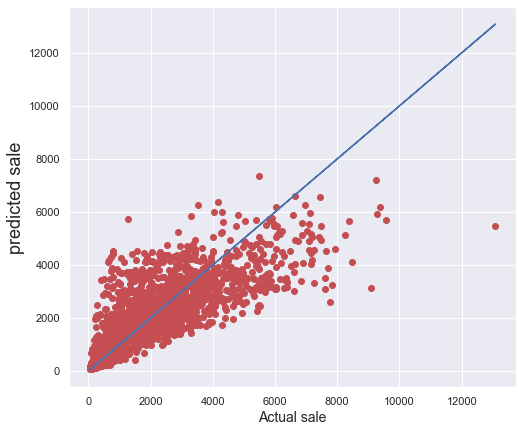

In [113]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= gb_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sale', fontsize= 14 )
plt.ylabel('predicted sale', fontsize= 18)
plt.show()

R2 score: 58.52539946563129
Cross val Score : 59.554382473876736
    
Both the score having considerable diffrence so we cannot select GradientBoostingRegressor as our best model.

# We can see KNeighborsRegressor Having good very less diffrence in R2 score and Cross Val Score. we can consider this our best model.

### Saving Best Model 

In [114]:
import pickle
filename='Big_Mart_Sales_Prediction.pkl'
pickle.dump(kn,open(filename,'wb'))

In [115]:
loaded_model = pickle.load(open(filename, 'rb'))

In [116]:
prediction=loaded_model.predict(test)

In [117]:
print(prediction)

[3515.95664    4089.83185333 3293.75698667 ... 3730.52178667 4222.59237333
 3533.53376   ]


In [118]:
predicted= pd.DataFrame(data=prediction)

predicted.to_csv('prediction.csv',index=False)